## BP 演算法訓練的神經網路

目標：嘗試著用輸入去預測輸出，並了解權重的更新。

考慮以下情形，給定三列輸入，試著去預測對應的一列輸出，我們可以通過簡單測量輸入與輸出值的資料來解決這一問題。最左邊的一列輸入值和輸出值是完美匹配/完全相關的，反向傳播演算法便是通過這種方式來衡量資料間統計關係進而得到模型的。

## 參數定義

X: 輸入資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。

y: 輸出資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。

l0: 網路第 1 層，即網路輸入層。

l1:	網路第 2 層，常稱作隱藏層。

syn0: 第一層權值，突觸 0，連接 l0 層與 l1 層。

## 語法定義

"–": 元素相減，故兩等長向量相減等同於其對等元素分別相減，結果為同等長度的向量。

"\*": 逐元素相乘，故兩等長向量相乘等同於其對等元素分別相乘，結果為同等長度的向量。

x.dot(y): 若 x 和 y 為向量，則進行點積操作；若均為矩陣，則進行矩陣相乘操作；若其中之一為矩陣，則進行向量與矩陣相乘操作。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
# 輸入 X: 4 * 3 的矩陣，總共四筆訓練資料，每筆三個特徵與 syn0 三個權重配對，即一個神經元有三個輸入節點。
X = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])

# 輸出 y: 4 * 1 的矩陣，為行向量，即一個神經元有一個輸出節點。
y = np.array([[0, 0, 1, 1]]).T

# 突觸 0: 4 * 1 的矩陣，為行向量，初始隨機值介於 [-1, 1] 的權重矩陣。
w = 2 * np.random.random((3, 1,)) - 1

## 定義 acfun 為 Sigmoid 啟動函數 y = σ(x)

當反向傳播時，val 不是啟動函數的輸入值而是其輸出值，參數 derivative 應為 True。

例如，l0 有三個參數 x1、x2、x3，l1 為 z = w1x1 + w2x2 + w3x3，out 為 y = σ(z)，loss 為 y - y_hat。計算損失函數與權重的變化：

因為 ∂L/∂z = ∂y/∂z * ∂L/∂y，其中 ∂y/∂z = σ'(z) = σ(z) * (1 - σ(z)) = y * (1 - y)，這是 Sigmoid 函數優異的特性之一，在於只用它的輸出值便可以得到其導數值。又 ∂L/∂w = ∂z/∂w * ∂L/∂z，藉由 ∂z/∂w = xT 可再推得 ∂L/∂w。

In [3]:
def acfun(val, derivative=False):
    if derivative:
        return val * (1 - val)
    return 1 / (1 + np.exp(-val))

In [4]:
def back_propagation_iterator(l0, out, syn0, epochs=10000, learning_rate=0.1):
    iters = {}
    for i in range(epochs):
        l1 = acfun(np.dot(l0, syn0))
        dLdl1 = acfun(l1, True) * (out - l1)
        dLdsy0 = np.dot(l0.T, dLdl1)
        syn0, iters[i] = syn0 - learning_rate * dLdsy0, syn0
    return np.array(list(iters.items()))

def back_propagation_plot(n, syn, title):
    for i in range(syn.shape[1]):
        plt.plot(n, syn[:, i], ms=3, lw=1.5, c='k')
    plt.xlabel(f'${title}$', fontsize=16)
    plt.show()

## 神經網路訓練

In [5]:
iters = back_propagation_iterator(X, y, w)
iters

array([[0,
        array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])],
       [1,
        array([[-0.194577  ],
       [ 0.43425769],
       [-1.0146846 ]])],
       [2,
        array([[-0.22299174],
       [ 0.4277314 ],
       [-1.02964803]])],
       ...,
       [9997,
        array([[-13.27851199],
       [  0.43356606],
       [  6.21623664]])],
       [9998,
        array([[-13.27872912],
       [  0.43356332],
       [  6.21634692]])],
       [9999,
        array([[-13.27894622],
       [  0.43356059],
       [  6.21645719]])]], dtype=object)

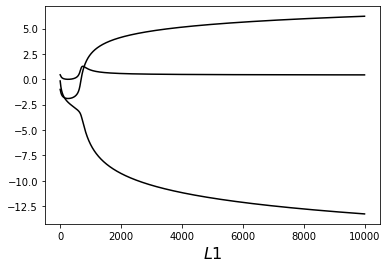

In [6]:
back_propagation_plot(iters[:, 0], np.array(list(iters[:, 1])), 'L1')